In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as colr
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sbs
import re

In [2]:
input_csv = "/home/marcel/TUM/Bachelor/cpu_info.csv"

In [3]:
df = pd.read_csv(input_csv, sep=';')
df = df.rename(columns={'Unnamed: 0': 'Time step'})
df

,Time step,CPU Power,GPU Power,DRAM Power,Package Power,E-Cluster Power,E-Cluster frequency,E-Cluster usage,P-Cluster Power,P-Cluster frequency,...,CPU 3 (E) usage,CPU 4 (P) frequency,CPU 4 (P) usage,CPU 5 (P) frequency,CPU 5 (P) usage,CPU 6 (P) frequency,CPU 6 (P) usage,CPU 7 (P) frequency,CPU 7 (P) usage,0
0,0,80,0,6,80,6,0.979,0.0581,74,0.685,...,0.0048,2.754,0.0236,1.904,0.0065,2.506,0.0013,1.585,0.0014,80.0
1,1,12,0,3,12,7,0.987,0.0634,6,0.606,...,0.0105,0.965,0.0068,0.967,0.0009,1.007,0.0015,1.045,0.0006,12.0
2,2,35,1,3,36,6,0.981,0.0544,30,0.672,...,0.0065,1.631,0.0150,2.094,0.0069,2.191,0.0019,1.969,0.0002,36.0
3,3,80,1,6,81,8,0.983,0.0653,72,0.697,...,0.0095,2.200,0.0210,2.457,0.0102,1.730,0.0073,1.710,0.0002,81.0
4,4,2805,0,90,2805,11,1.041,0.0640,2794,2.156,...,0.0108,3.086,0.3180,3.106,0.3065,3.119,0.1281,3.186,0.0587,2805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,8911,114,0,9,134,10,0.976,0.1229,104,0.665,...,0.0132,2.530,0.0301,1.319,0.0001,0.600,0.0000,0.600,0.0000,134.0
8912,8912,8,0,2,8,6,0.976,0.0563,2,0.602,...,0.0067,1.004,0.0031,0.600,0.0000,0.600,0.0000,0.600,0.0000,8.0
8913,8913,7,1,2,8,4,0.976,0.0376,3,0.633,...,0.0024,1.447,0.0029,2.904,0.0002,2.930,0.0000,0.600,0.0000,8.0
8914,8914,4,0,1,4,3,0.975,0.0304,1,0.601,...,0.0018,1.065,0.0020,0.600,0.0000,0.600,0.0000,0.600,0.0000,4.0


In [4]:
# Multiply time step by seconds per step
df['Time step'] = df['Time step'].apply(lambda x: x*5)
df

,Time step,CPU Power,GPU Power,DRAM Power,Package Power,E-Cluster Power,E-Cluster frequency,E-Cluster usage,P-Cluster Power,P-Cluster frequency,...,CPU 3 (E) usage,CPU 4 (P) frequency,CPU 4 (P) usage,CPU 5 (P) frequency,CPU 5 (P) usage,CPU 6 (P) frequency,CPU 6 (P) usage,CPU 7 (P) frequency,CPU 7 (P) usage,0
0,0,80,0,6,80,6,0.979,0.0581,74,0.685,...,0.0048,2.754,0.0236,1.904,0.0065,2.506,0.0013,1.585,0.0014,80.0
1,5,12,0,3,12,7,0.987,0.0634,6,0.606,...,0.0105,0.965,0.0068,0.967,0.0009,1.007,0.0015,1.045,0.0006,12.0
2,10,35,1,3,36,6,0.981,0.0544,30,0.672,...,0.0065,1.631,0.0150,2.094,0.0069,2.191,0.0019,1.969,0.0002,36.0
3,15,80,1,6,81,8,0.983,0.0653,72,0.697,...,0.0095,2.200,0.0210,2.457,0.0102,1.730,0.0073,1.710,0.0002,81.0
4,20,2805,0,90,2805,11,1.041,0.0640,2794,2.156,...,0.0108,3.086,0.3180,3.106,0.3065,3.119,0.1281,3.186,0.0587,2805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,44555,114,0,9,134,10,0.976,0.1229,104,0.665,...,0.0132,2.530,0.0301,1.319,0.0001,0.600,0.0000,0.600,0.0000,134.0
8912,44560,8,0,2,8,6,0.976,0.0563,2,0.602,...,0.0067,1.004,0.0031,0.600,0.0000,0.600,0.0000,0.600,0.0000,8.0
8913,44565,7,1,2,8,4,0.976,0.0376,3,0.633,...,0.0024,1.447,0.0029,2.904,0.0002,2.930,0.0000,0.600,0.0000,8.0
8914,44570,4,0,1,4,3,0.975,0.0304,1,0.601,...,0.0018,1.065,0.0020,0.600,0.0000,0.600,0.0000,0.600,0.0000,4.0


In [5]:
df_freq = df.filter(regex='(.*frequency.*|Time step)')
df_freq

,Time step,E-Cluster frequency,P-Cluster frequency,CPU 0 (E) frequency,CPU 1 (E) frequency,CPU 2 (E) frequency,CPU 3 (E) frequency,CPU 4 (P) frequency,CPU 5 (P) frequency,CPU 6 (P) frequency,CPU 7 (P) frequency
0,0,0.979,0.685,1.002,1.006,1.149,1.163,2.754,1.904,2.506,1.585
1,5,0.987,0.606,1.012,1.044,1.119,1.146,0.965,0.967,1.007,1.045
2,10,0.981,0.672,1.060,1.004,1.068,0.985,1.631,2.094,2.191,1.969
3,15,0.983,0.697,1.041,1.023,1.102,1.174,2.200,2.457,1.730,1.710
4,20,1.041,2.156,1.156,1.223,1.376,1.209,3.086,3.106,3.119,3.186
...,...,...,...,...,...,...,...,...,...,...,...
8911,44555,0.976,0.665,0.987,0.996,0.975,0.985,2.530,1.319,0.600,0.600
8912,44560,0.976,0.602,0.992,1.039,1.017,1.011,1.004,0.600,0.600,0.600
8913,44565,0.976,0.633,0.977,1.059,0.989,0.976,1.447,2.904,2.930,0.600
8914,44570,0.975,0.601,0.978,1.115,0.974,0.972,1.065,0.600,0.600,0.600


In [6]:
df_usage = df.filter(regex='(.*usage.*|Time step)')
df_usage

,Time step,E-Cluster usage,P-Cluster usage,CPU 0 (E) usage,CPU 1 (E) usage,CPU 2 (E) usage,CPU 3 (E) usage,CPU 4 (P) usage,CPU 5 (P) usage,CPU 6 (P) usage,CPU 7 (P) usage
0,0,0.0581,0.0293,0.0222,0.0338,0.0162,0.0048,0.0236,0.0065,0.0013,0.0014
1,5,0.0634,0.0076,0.0298,0.0279,0.0135,0.0105,0.0068,0.0009,0.0015,0.0006
2,10,0.0544,0.0198,0.0258,0.0232,0.0127,0.0065,0.0150,0.0069,0.0019,0.0002
3,15,0.0653,0.0333,0.0296,0.0291,0.0214,0.0095,0.0210,0.0102,0.0073,0.0002
4,20,0.0640,0.6226,0.0318,0.0316,0.0126,0.0108,0.3180,0.3065,0.1281,0.0587
...,...,...,...,...,...,...,...,...,...,...,...
8911,44555,0.1229,0.0302,0.0450,0.0539,0.0292,0.0132,0.0301,0.0001,0.0000,0.0000
8912,44560,0.0563,0.0031,0.0278,0.0282,0.0151,0.0067,0.0031,0.0000,0.0000,0.0000
8913,44565,0.0376,0.0030,0.0182,0.0197,0.0071,0.0024,0.0029,0.0002,0.0000,0.0000
8914,44570,0.0304,0.0020,0.0145,0.0168,0.0037,0.0018,0.0020,0.0000,0.0000,0.0000


In [7]:
df_power = df.filter(regex='(.*Power.*|Time step)')
df_power

,Time step,CPU Power,GPU Power,DRAM Power,Package Power,E-Cluster Power,P-Cluster Power
0,0,80,0,6,80,6,74
1,5,12,0,3,12,7,6
2,10,35,1,3,36,6,30
3,15,80,1,6,81,8,72
4,20,2805,0,90,2805,11,2794
...,...,...,...,...,...,...,...
8911,44555,114,0,9,134,10,104
8912,44560,8,0,2,8,6,2
8913,44565,7,1,2,8,4,3
8914,44570,4,0,1,4,3,1


In [8]:
df_freq = df_freq.set_index('Time step')
df_usage = df_usage.set_index('Time step')
df_power = df_power.set_index('Time step')
df_freq

,E-Cluster frequency,P-Cluster frequency,CPU 0 (E) frequency,CPU 1 (E) frequency,CPU 2 (E) frequency,CPU 3 (E) frequency,CPU 4 (P) frequency,CPU 5 (P) frequency,CPU 6 (P) frequency,CPU 7 (P) frequency
Time step,,,,,,,,,,
0,0.979,0.685,1.002,1.006,1.149,1.163,2.754,1.904,2.506,1.585
5,0.987,0.606,1.012,1.044,1.119,1.146,0.965,0.967,1.007,1.045
10,0.981,0.672,1.060,1.004,1.068,0.985,1.631,2.094,2.191,1.969
15,0.983,0.697,1.041,1.023,1.102,1.174,2.200,2.457,1.730,1.710
20,1.041,2.156,1.156,1.223,1.376,1.209,3.086,3.106,3.119,3.186
...,...,...,...,...,...,...,...,...,...,...
44555,0.976,0.665,0.987,0.996,0.975,0.985,2.530,1.319,0.600,0.600
44560,0.976,0.602,0.992,1.039,1.017,1.011,1.004,0.600,0.600,0.600
44565,0.976,0.633,0.977,1.059,0.989,0.976,1.447,2.904,2.930,0.600


In [9]:
# Rescale Power graph
df_power = df_power.div(1000)
# Rescale CPU usage graph
df_usage = df_usage.div(0.01)

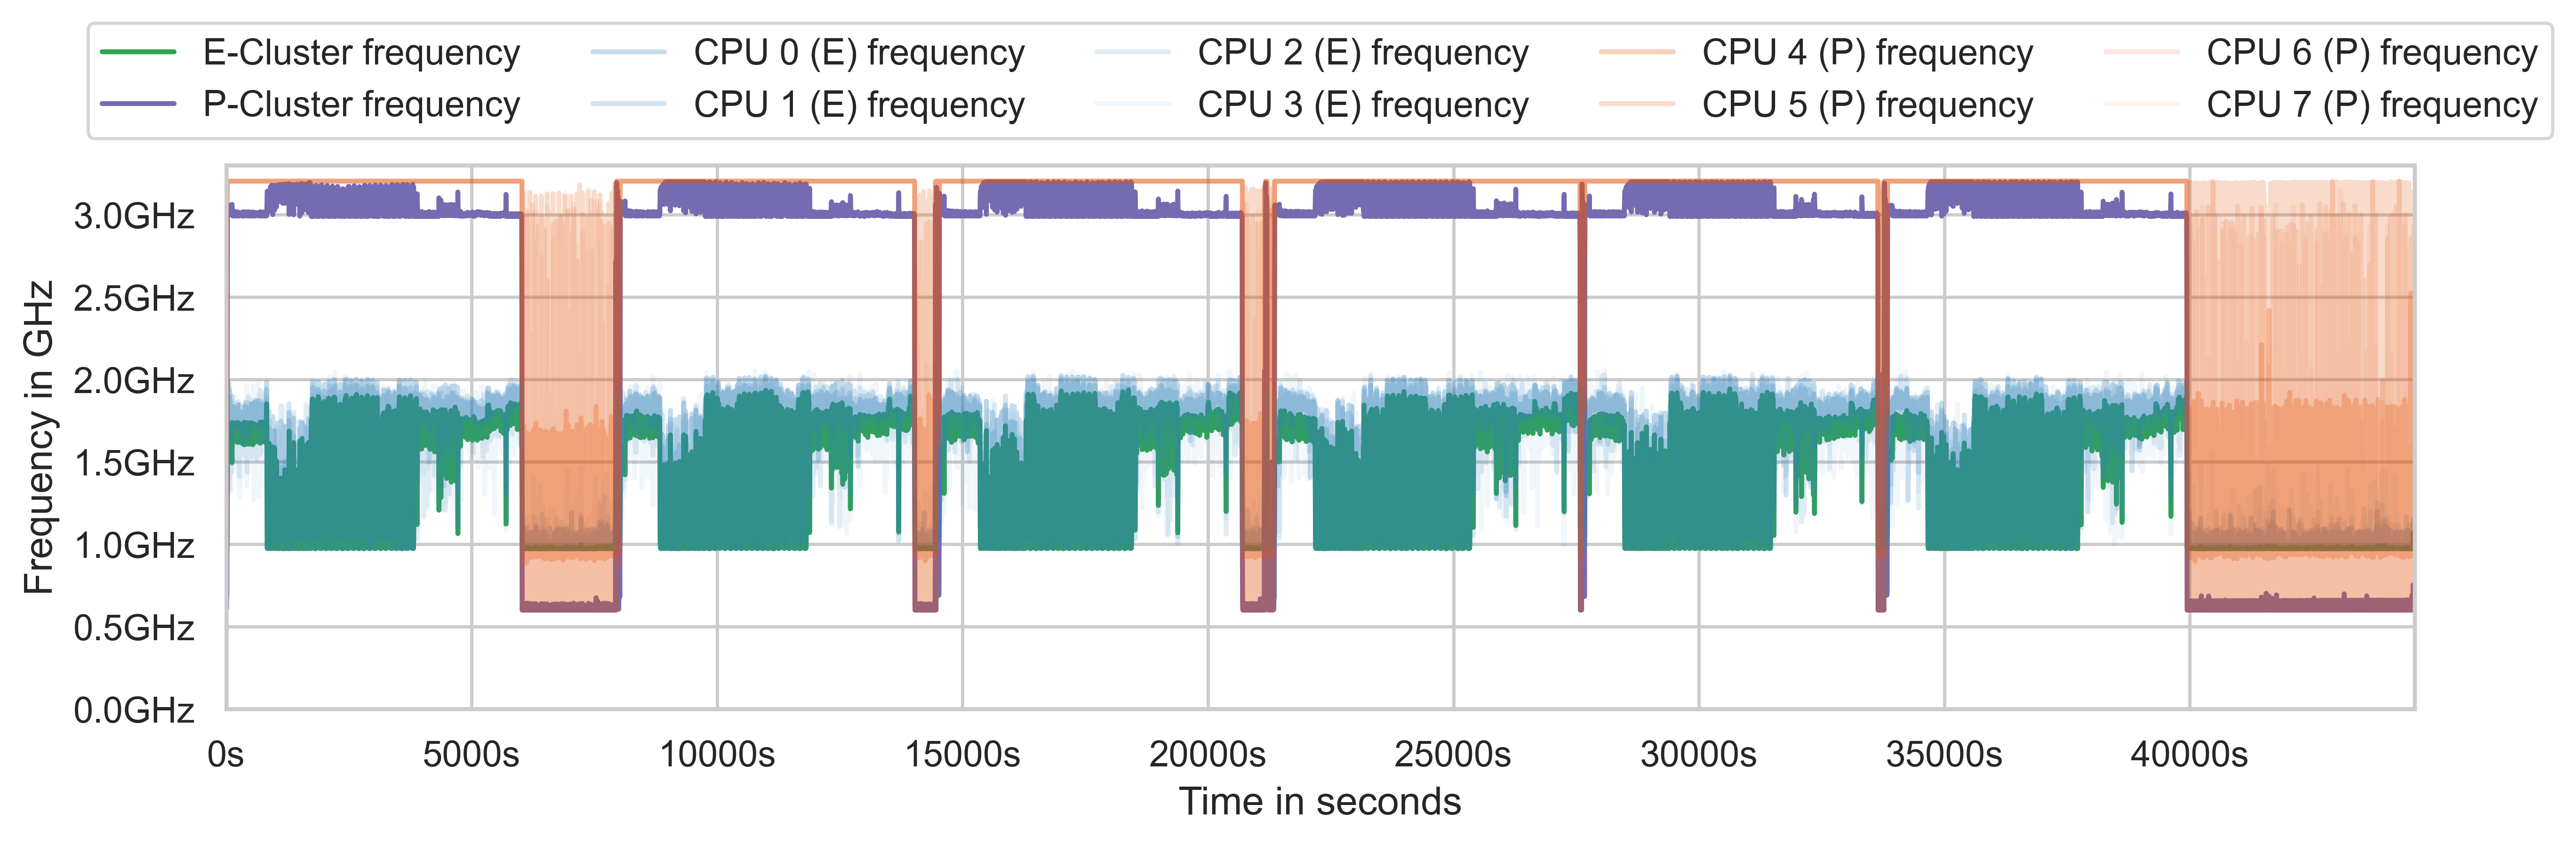

In [39]:
# Plot
#fig = plt.figure(figsize=(10, 3), dpi=500)
plt.rcParams["figure.dpi"] = 500
sbs.set(style="whitegrid")

# used colormarp 'tab20c' https://matplotlib.org/stable/tutorials/colors/colormaps.html
palette = {
    'orange': '#e6550d',
    'green' : '#31a354',
    'blue'  : '#3182bd',
    'purple': '#756bb1',
    'pink'  : '#7b4173',
    'red'   : '#843c39',
    'yellow': '#ffd92f',
    'magenta':'#ff00ff'
}

palette_ext = {}

base_aplha = 0.35
for key in palette:
    hex_col = palette[key]
    palette_ext[key] = hex_col
    
    aplha_step = -base_aplha/5
    
    for i in range(1,5):
        rgba_col = colr.to_rgba(hex_col, base_aplha + aplha_step*i)
        palette_ext[f"{key}A{i}"] = colr.to_hex(rgba_col, True)

color_style = [ palette_ext['green'], palette_ext['purple'], 
                palette_ext['blueA1'], palette_ext['blueA2'], palette_ext['blueA3'], palette_ext['blueA4'],
                palette_ext['orangeA1'], palette_ext['orangeA2'], palette_ext['orangeA3'], palette_ext['orangeA4']]

ax = df_freq.plot.line(color=color_style, figsize=(12, 3))


plt.grid(visible=True, axis='y')
plt.ylim(0, 3.3)
plt.xlim(0, df_freq.index.values[-1])
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%0.1fGHz'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%ds'))
plt.ylabel("Frequency in GHz")
plt.xlabel("Time in seconds")



plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), borderaxespad=0, ncol=5)

In [40]:
ax.figure.savefig(f"{input_csv[:-4]}-freq.pdf", dpi=500, bbox_inches='tight')

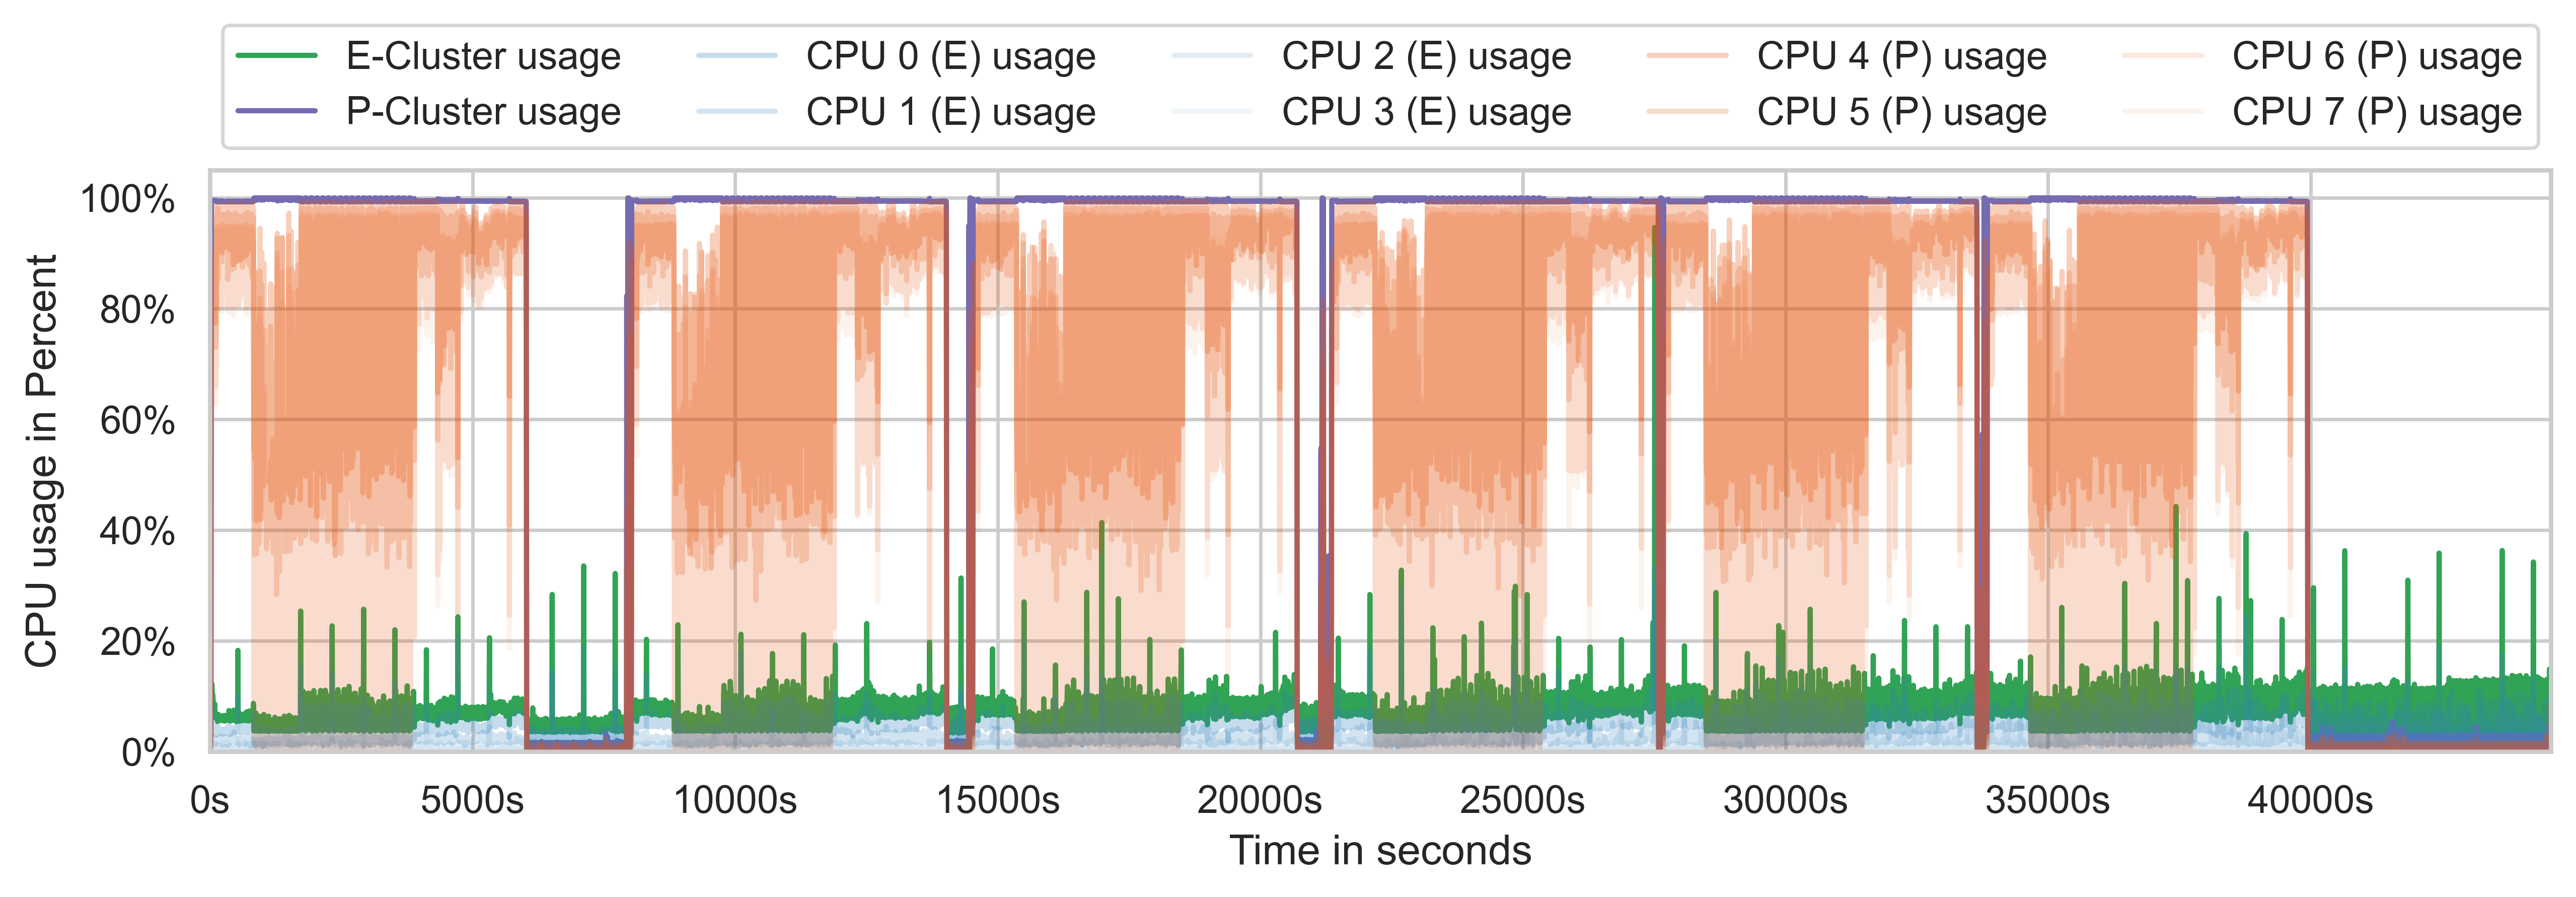

In [30]:
ax = df_usage.plot.line(color=color_style, figsize=(12, 3))


plt.grid(visible=True, axis='y')
plt.ylim(0, 105)
plt.xlim(0, df_freq.index.values[-1])
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%ds'))
plt.ylabel("CPU usage in Percent")
plt.xlabel("Time in seconds")



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), borderaxespad=0, ncol=5)

In [31]:
ax.figure.savefig(f"{input_csv[:-4]}-usage.pdf", dpi=500, bbox_inches='tight')

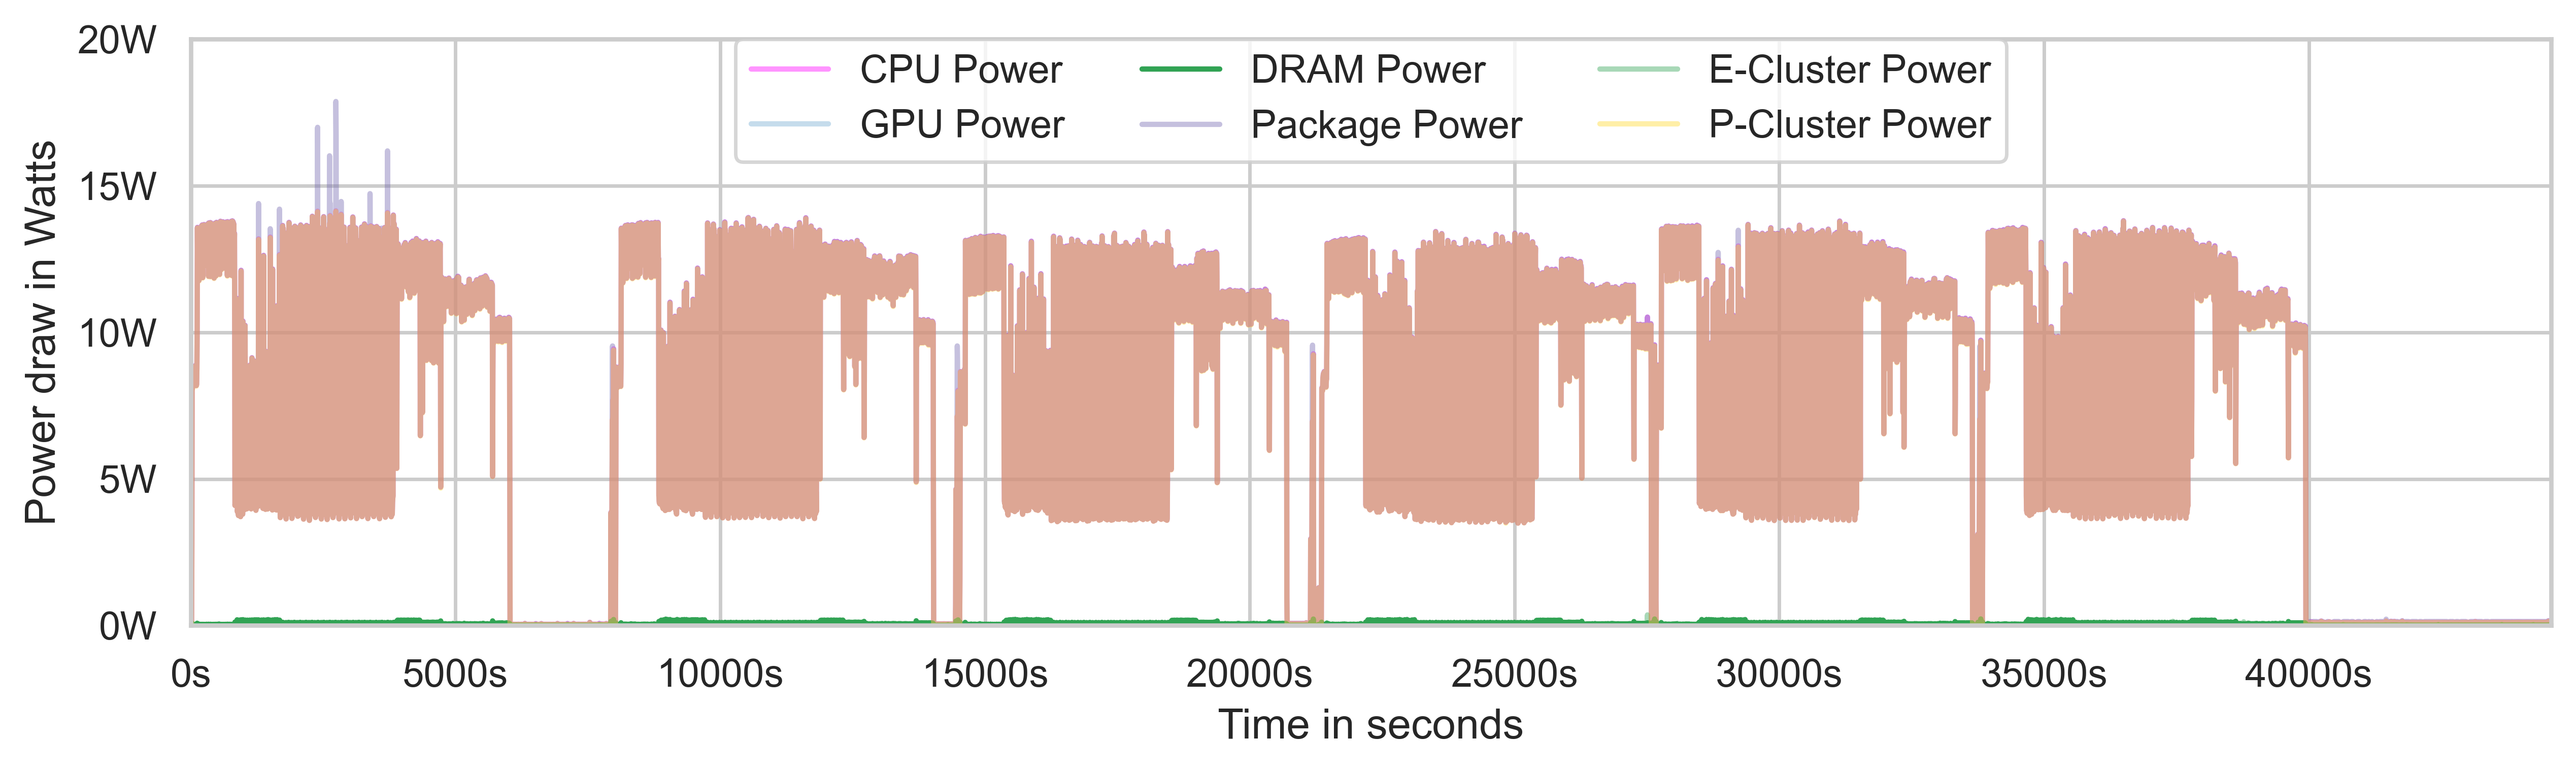

In [36]:
palette_ext = {}

base_aplha = 0.7
for key in palette:
    hex_col = palette[key]
    palette_ext[key] = hex_col
    
    aplha_step = -base_aplha/5
    
    for i in range(1,5):
        rgba_col = colr.to_rgba(hex_col, base_aplha + aplha_step*i)
        palette_ext[f"{key}A{i}"] = colr.to_hex(rgba_col, True)
        

power_color_style = [ palette_ext['magentaA2'],  palette_ext['blueA3'], palette_ext['green'],
                     palette_ext['purpleA2'], palette_ext['greenA2'], palette_ext['yellowA2'] ]


ax = df_power.plot.line(color=power_color_style, figsize=(12, 3))


plt.grid(visible=True, axis='y')
plt.ylim(0, 20)
plt.xlim(0, df_freq.index.values[-1])
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%dW'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%ds'))
plt.ylabel("Power draw in Watts")
plt.xlabel("Time in seconds")



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), borderaxespad=0, ncol=3)

In [37]:
ax.figure.savefig(f"{input_csv[:-4]}-power.pdf", dpi=500, bbox_inches='tight')